In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dataset/Datasets/Test/mercedes/45.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/30.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/38.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/42.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/33.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/35.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/41.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/37.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/44.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/29.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/28.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/40.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/31.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/43.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/32.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/39.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes/34.jpg
/kaggle/input/car-dataset/Datasets/Test/mercedes

In [2]:
#https://www.youtube.com/watch?v=Ie4-AOpPxBg&list=PLZoTAELRMXVPUyxuK8AphGMuIJHTyuWna&index=4

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

2022-11-26 08:51:16.491472: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-11-26 08:51:16.491573: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/car-dataset/Datasets/Train'
valid_path = '/kaggle/input/car-dataset/Datasets/Test'

In [5]:
[224, 224]+[3] #image has RGB channel thats why 3 added to resnet


[224, 224, 3]

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of resnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#in resnet we have 1000 categories but we need only 3 categories so we dont have to include the first and last so include_top=false 
#also own dataset we have so include_to =false

2022-11-26 08:51:21.706257: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-26 08:51:21.709483: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-11-26 08:51:21.709507: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-26 08:51:21.709529: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7848f9101796): /proc/driver/nvidia/version does not exist
2022-11-26 08:51:21.709753: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

94773248/94765736 [==============================] - 1s 0us/step


In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
#we only train first and last layer ... rest of the layers already have predefined weights in imagenet

In [9]:
 # useful for getting number of output classes
folders = glob('/kaggle/input/car-dataset/Datasets/Train/*')

In [10]:
folders

['/kaggle/input/car-dataset/Datasets/Train/mercedes',
 '/kaggle/input/car-dataset/Datasets/Train/lamborghini',
 '/kaggle/input/car-dataset/Datasets/Train/audi']

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
#

In [12]:
prediction = Dense(len(folders), activation='softmax')(x) #use Dense to set length of folders as output

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
#dense layer does not have a concolutional layer, it will just be like ann layer
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
#data augmentation by using imagedatagenerator ....REad images from folders and applies augmentation horizontal zooming,flipping,etc.
# Use the Image Data Generator to import the images from the dataset
#before using imagedatagenerator we need to scale down our image values so scaling technique is /255 to convert pixels from 0-255 to 0-1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) #properties

test_datagen = ImageDataGenerator(rescale = 1./255)

#in test data never use image augmentation but we need to scale all the images

In [16]:
#using traindatagen and applying it using flow_from_directory
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('/kaggle/input/car-dataset/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/kaggle/input/car-dataset/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-26 08:51:24.740328: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-26 08:51:24.744846: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2249995000 Hz


Epoch 1/50
2/2 [==============================] - 12s 7s/step - loss: 3.2010 - accuracy: 0.3438 - val_loss: 17.7373 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 8s 6s/step - loss: 10.3226 - accuracy: 0.3438 - val_loss: 9.3092 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 8s 6s/step - loss: 4.8554 - accuracy: 0.4375 - val_loss: 1.7957 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 2.5161 - accuracy: 0.3646 - val_loss: 1.9021 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 1.7848 - accuracy: 0.4792 - val_loss: 3.4202 - val_accuracy: 0.3793
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 2.2661 - accuracy: 0.5625 - val_loss: 3.2787 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 8s 6s/step - loss: 1.5030 - accuracy: 0.6146 - val_loss: 0.9913 - val_accuracy: 0.5690
Epoch 8/50
2/2 [======================

In [19]:
r.history

{'loss': [4.051666736602783,
  9.518569946289062,
  4.2623982429504395,
  2.9220948219299316,
  1.581678032875061,
  2.1257576942443848,
  1.4379549026489258,
  0.9420318007469177,
  1.1467806100845337,
  0.9352443218231201,
  0.7398743033409119,
  0.8317630887031555,
  0.5355532169342041,
  0.6649667024612427,
  0.6397452354431152,
  0.6029096245765686,
  0.46095195412635803,
  0.6582123041152954,
  0.4842859208583832,
  0.7012124061584473,
  0.4112672805786133,
  0.4051107168197632,
  0.4362778663635254,
  0.3456065356731415,
  0.36523935198783875,
  0.3278782069683075,
  0.3588913381099701,
  0.29364925622940063,
  0.2789289355278015,
  0.3225546181201935,
  0.27711033821105957,
  0.2432771623134613,
  0.24404489994049072,
  0.27215802669525146,
  0.26709461212158203,
  0.2251947820186615,
  0.22415566444396973,
  0.24374732375144958,
  0.23810739815235138,
  0.2514418661594391,
  0.24154943227767944,
  0.275180459022522,
  0.2198537141084671,
  0.25646352767944336,
  0.253771901130

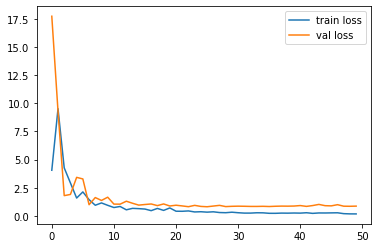

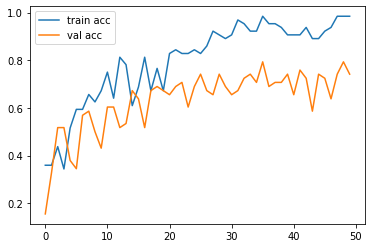

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred


array([[5.5350680e-03, 9.2532879e-01, 6.9136150e-02],
       [1.7818442e-02, 9.8068237e-01, 1.4992338e-03],
       [2.3782773e-02, 8.8668090e-01, 8.9536391e-02],
       [5.6967918e-02, 3.6648021e-04, 9.4266564e-01],
       [2.1222109e-02, 4.0462872e-01, 5.7414919e-01],
       [2.9163154e-02, 7.6034862e-01, 2.1048819e-01],
       [2.2116542e-02, 5.3945327e-01, 4.3843022e-01],
       [9.0156734e-01, 5.0030168e-02, 4.8402514e-02],
       [6.8487823e-01, 2.2739469e-01, 8.7727048e-02],
       [2.6304942e-02, 9.0410399e-01, 6.9591001e-02],
       [5.8616649e-02, 3.3407936e-01, 6.0730404e-01],
       [4.9852028e-02, 1.5246763e-02, 9.3490124e-01],
       [3.5217552e-05, 2.6670311e-04, 9.9969816e-01],
       [7.6863688e-04, 9.7214353e-01, 2.7087837e-02],
       [1.4416088e-01, 6.4995635e-01, 2.0588280e-01],
       [2.6627498e-02, 1.9680798e-01, 7.7656448e-01],
       [3.0447589e-02, 4.8048243e-01, 4.8907000e-01],
       [5.6470686e-04, 9.9150652e-01, 7.9288064e-03],
       [8.8639483e-02, 3.739

In [28]:
y_pred.shape

(58,)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_resnet50.h5')

In [88]:
img=image.load_img('/kaggle/input/car-dataset/Datasets/Test/mercedes/45.jpg',target_size=(224,224))


In [89]:
x=image.img_to_array(img)
x

array([[[ 81., 113., 124.],
        [ 81., 113., 124.],
        [ 81., 113., 124.],
        ...,
        [ 31.,  66.,  86.],
        [ 31.,  66.,  86.],
        [ 31.,  66.,  86.]],

       [[ 82., 114., 125.],
        [ 82., 114., 125.],
        [ 82., 114., 125.],
        ...,
        [ 32.,  67.,  87.],
        [ 32.,  67.,  87.],
        [ 32.,  67.,  87.]],

       [[ 84., 116., 127.],
        [ 84., 116., 127.],
        [ 84., 116., 127.],
        ...,
        [ 33.,  68.,  88.],
        [ 33.,  68.,  88.],
        [ 33.,  68.,  88.]],

       ...,

       [[ 59.,  64.,  70.],
        [121., 126., 130.],
        [133., 138., 142.],
        ...,
        [ 17.,  20.,  25.],
        [ 17.,  20.,  25.],
        [ 17.,  20.,  25.]],

       [[ 67.,  70.,  75.],
        [ 90.,  93.,  98.],
        [140., 143., 148.],
        ...,
        [ 19.,  22.,  27.],
        [ 19.,  22.,  27.],
        [ 20.,  23.,  28.]],

       [[ 67.,  70.,  75.],
        [ 90.,  93.,  98.],
        [139., 1

In [90]:
x.shape


(224, 224, 3)

In [91]:
x=x/255

In [92]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [93]:
model.predict(img_data)


array([[2.8816302e-04, 8.7461440e-04, 9.9883729e-01]], dtype=float32)

In [94]:
a=np.argmax(model.predict(img_data), axis=1)


In [95]:
a

array([2])

In [96]:
a==1

array([False])